Jalen Buffert
 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, ConfusionMatrixDisplay



mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [46]:
'''your code here. add cells as needed'''
#Split Data 
target = mushrooms_df['type'] 
features = mushrooms_df.drop(columns=['type']) 

In [47]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

ord_features = ['gill_size', 'stalk_root', 'ring_number']  # Example ordinal features
ordEnc = OrdinalEncoder(categories = [['n', 'b'],['e','c','b','r','?'],['o','t','n']])

cat_features = ['cap_shape', 'cap_surface','cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing',
                'gill_color', 'stalk_shape', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_type',
                'spore_print_color', 'population', 'habitat']
oneHotEnc = OneHotEncoder(sparse_output=False)  # Set sparse_output to False


coltrans = ColumnTransformer(
    transformers=[
        ("ord", ordEnc, ord_features),
        ("onehot", oneHotEnc, cat_features)
        ],
    remainder='passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(features)
print(X_trans)

labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(target)

lab_names = labEnc.classes_

[[0. 0. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 4. 0. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [1. 4. 0. ... 0. 0. 0.]]


In [48]:
new_feature_names = coltrans.get_feature_names_out()
mush_df2= pd.DataFrame(X_trans, columns = new_feature_names)
print(mush_df2)



      gill_size  stalk_root  ring_number  cap_shape_b  cap_shape_c  \
0           0.0         0.0          0.0          0.0          0.0   
1           1.0         1.0          0.0          0.0          0.0   
2           1.0         1.0          0.0          1.0          0.0   
3           0.0         0.0          0.0          0.0          0.0   
4           1.0         0.0          0.0          0.0          0.0   
...         ...         ...          ...          ...          ...   
8119        1.0         4.0          0.0          0.0          0.0   
8120        1.0         4.0          0.0          0.0          0.0   
8121        1.0         4.0          0.0          0.0          0.0   
8122        0.0         4.0          0.0          0.0          0.0   
8123        1.0         4.0          0.0          0.0          0.0   

      cap_shape_f  cap_shape_k  cap_shape_s  cap_shape_x  cap_surface_f  ...  \
0             0.0          0.0          0.0          1.0            0.0  ...   

Logistic Regression, Random Forest, Decision Tree 

Logistic Reg Results:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Figure size 600x800 with 0 Axes>

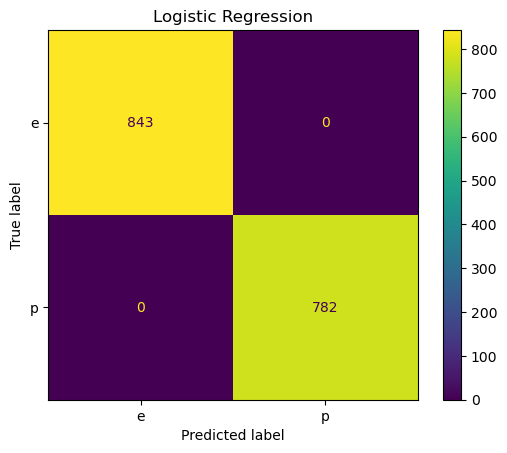


Decision Tree Results (Best Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2})
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Figure size 600x800 with 0 Axes>

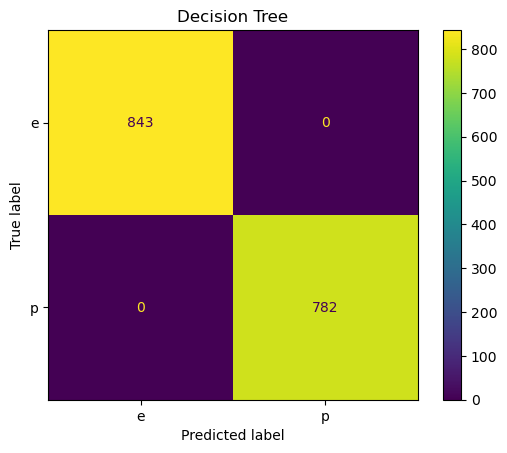


Random Forest Results (Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50})
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Figure size 600x800 with 0 Axes>

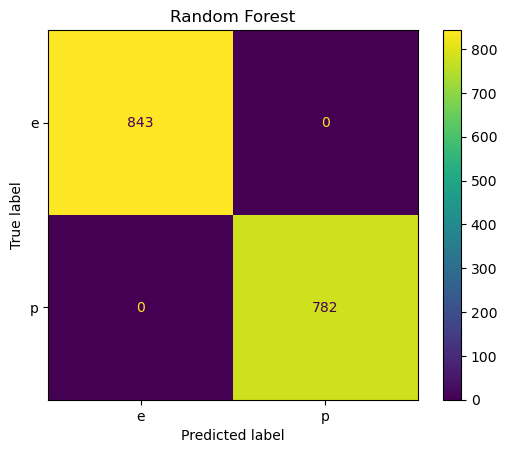

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(mush_df2, target, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Train Logistic Regression with cross-validation

log_reg = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test_scaled)

plt.figure(figsize=(6,8))
print("Logistic Reg Results:")
print(classification_report(y_test, y_pred_log))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title('Logistic Regression')
plt.show()

tree_param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
tree_clf.fit(X_train_scaled, y_train)
y_pred_tree = tree_clf.best_estimator_.predict(X_test_scaled)

plt.figure(figsize=(6,8))
print("\nDecision Tree Results (Best Params: {})".format(tree_clf.best_params_))
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_estimator(tree_clf.best_estimator_, X_test_scaled, y_test)
plt.title('Decision Tree')
plt.show()

rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.best_estimator_.predict(X_test_scaled)

plt.figure(figsize=(6,8))
print("\nRandom Forest Results (Best Params: {})".format(rf_clf.best_params_))
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf_clf.best_estimator_, X_test_scaled, y_test)
plt.title('Random Forest')
plt.show()


### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: All of the models predicted the data in the same way
- Hyper-parameters: If i chose decision tree, the hyperparameters would be max_depth, min_samples_split, min_samples_leaf, and random_state 
- Metrics
    - Accuracy: 1.00
    - Recall: 1.00
    - Precision: 1.00
- How did you decide best? 
I decided by comparing all of the values from the matrix but they were all the same

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [69]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

nfl_draft.head()


,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


In [70]:
def draft_day(round_d):
    if round_d == 1:
        return 1
    elif round_d in [2, 3]:
        return 2
    else:
        return 3
    
nfl_draft['draft_day'] = nfl_draft['round'].apply(draft_day)

nfl_draft.drop(columns=['round'], inplace=True)

nfl_draft

,Unnamed: 0,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle,draft_day
0,0,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN,1
1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83,1
2,2,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN,1
3,3,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04,1
4,4,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,2795,2024,Marcus Harris,23.0,DL,Southeastern Conference,6.166667,286.0,5.06,29.5,103.0,NaN,NaN,3
2299,2797,2024,Tatum Bethune,23.0,LB,Atlantic Coast Conference,6.000000,229.0,NaN,NaN,NaN,NaN,NaN,3
2300,2798,2024,Jaylen Harrell,22.0,DL,Big Ten Conference,6.333333,250.0,NaN,37.0,118.0,NaN,NaN,3
2301,2799,2024,Kalen King,21.0,DB,Big Ten Conference,5.916667,191.0,4.61,37.0,122.0,NaN,4.16,3


In [ ]:

cat_features = ['position', 'college_conference']
oneHotEnc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Set sparse_output to False and handle unknown categories

nfl_draft[cat_features] = nfl_draft[cat_features].fillna('Unknown')

# Define the features variable by selecting the relevant columns from nfl_draft
features = nfl_draft[cat_features]

coltrans = ColumnTransformer(
    transformers=[
        ("onehot", oneHotEnc, cat_features)
        ],
    remainder='passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(features)
print(X_trans)

# Fill missing values in numeric columns with the median
nfl_draft.fillna(nfl_draft.median(numeric_only=True), inplace=True)

target = nfl_draft['draft_day']
features = nfl_draft.drop(columns=['draft_day'])

labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(target)  # Use the 'draft_day' column from nfl_draft

lab_names = labEnc.classes_

[[0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [76]:
new_feature_names = coltrans.get_feature_names_out()
nfl_draft2= pd.DataFrame(X_trans, columns = new_feature_names)
print(nfl_draft2)


      position_DB  position_DL  position_LB  \
0             0.0          1.0          0.0   
1             1.0          0.0          0.0   
2             0.0          1.0          0.0   
3             0.0          1.0          0.0   
4             0.0          0.0          1.0   
...           ...          ...          ...   
2298          0.0          1.0          0.0   
2299          0.0          0.0          1.0   
2300          0.0          1.0          0.0   
2301          1.0          0.0          0.0   
2302          1.0          0.0          0.0   

      college_conference_American Athletic Conference  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
2298                                

Logistic Regression Results:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00       157
           3       0.51      1.00      0.67       234

    accuracy                           0.51       461
   macro avg       0.17      0.33      0.22       461
weighted avg       0.26      0.51      0.34       461



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


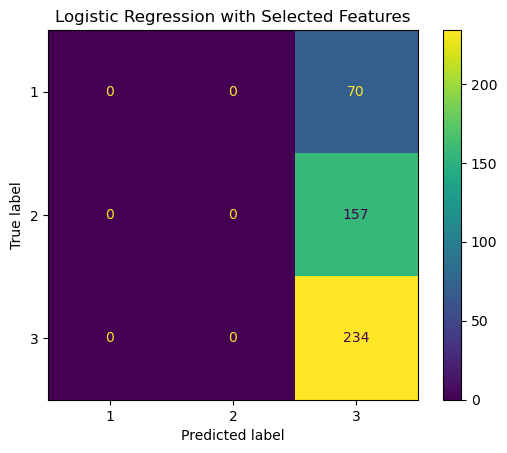

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nfl_draft2, target, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Select only the desired features
selected_features = ['age', 'height', 'forty']
X_train_selected = X_train_scaled[:, [features.columns.get_loc(col) for col in selected_features]]
X_test_selected = X_test_scaled[:, [features.columns.get_loc(col) for col in selected_features]]

# Example: Fit a Logistic Regression model
log_reg = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_selected)

# Display results
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_selected, y_test)
plt.title('Logistic Regression')
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?

 I used a logistic regression because the accuracy of previous models led me to beleive this one would give similar results 
 - What was your accuracy?
 51%